## ANN
- keras를 이용한 ANN 모델 구축

### 데이터 준비

In [2]:
import glob
base_path = './xray_classification_pneumonia/Dataset_compressed/train'
file_path = list(glob.glob(base_path + "/*/*.*"))

pneumonia = list(glob.glob(base_path+"/PNEUMONIA/*.*"))
normal = list(glob.glob(base_path+"/NORMAL/*.*"))

In [ ]:
label_name = {
    0:'Normal',
    1:'Pneumonia'
}

In [3]:
len(pneumonia), len(normal)

(3875, 1341)

In [4]:
import matplotlib.pyplot as plt
import os

test = os.path.dirname(file_path[0])
print(test)
class_name = os.path.split(os.path.dirname(test))
print(class_name)

./xray_classification_pneumonia/Dataset_compressed/train\NORMAL
('./xray_classification_pneumonia/Dataset_compressed', 'train')


In [5]:
# folder name to label
labels = []

for fp in file_path:
    tmp = os.path.dirname(fp)
    class_name = os.path.split(tmp)
    if class_name[1] == "PNEUMONIA":
        labels.append(1)
    else:
        labels.append(0)

In [6]:
import numpy as np
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2


img_width = 60
img_height = 60

dataset = np.ndarray(shape=(len(file_path), img_height*img_width), dtype=np.float32)

i=0
for _file in file_path:
    img = cv2.imread(_file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_width, img_height))
    
    dataset[i] = img_resized.flatten()
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4172, 1044, 4172, 1044)

In [10]:
y_train, y_test = map(lambda x: to_categorical(x), [y_train, y_test])

### 모델 생성

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [12]:
def build():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(3600,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    return model

model = build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               360100    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 365,252
Trainable params: 365,252
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.predict(dataset)

163/163 [==============================] - 0s 768us/step


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Adam 학습

In [14]:
model_adam = build()

model_adam.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model_adam.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=20
)

Epoch 1/20
66/66 [==============================] - 1s 5ms/step - loss: 33.0738 - accuracy: 0.7685 - val_loss: 13.5595 - val_accuracy: 0.6810
Epoch 2/20
66/66 [==============================] - 0s 3ms/step - loss: 4.4889 - accuracy: 0.8766 - val_loss: 4.4203 - val_accuracy: 0.8908
Epoch 3/20
66/66 [==============================] - 0s 3ms/step - loss: 1.8107 - accuracy: 0.9372 - val_loss: 3.1255 - val_accuracy: 0.8918
Epoch 4/20
66/66 [==============================] - 0s 3ms/step - loss: 5.8095 - accuracy: 0.8756 - val_loss: 3.0173 - val_accuracy: 0.9310
Epoch 5/20
66/66 [==============================] - 0s 3ms/step - loss: 5.4000 - accuracy: 0.8900 - val_loss: 2.1181 - val_accuracy: 0.9492
Epoch 6/20
66/66 [==============================] - 0s 3ms/step - loss: 2.6025 - accuracy: 0.9257 - val_loss: 1.9095 - val_accuracy: 0.9444
Epoch 7/20
66/66 [==============================] - 0s 3ms/step - loss: 4.0059 - accuracy: 0.9108 - val_loss: 3.8651 - val_accuracy: 0.9167
Epoch 8/20
66/66 [

### 예측

In [15]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model_adam.predict(X_test)
predicted_class = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

33/33 [==============================] - 0s 799us/step


#### 정확도 계산

In [16]:
accuracy = np.mean(predicted_class == true_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.02%


### 시각화

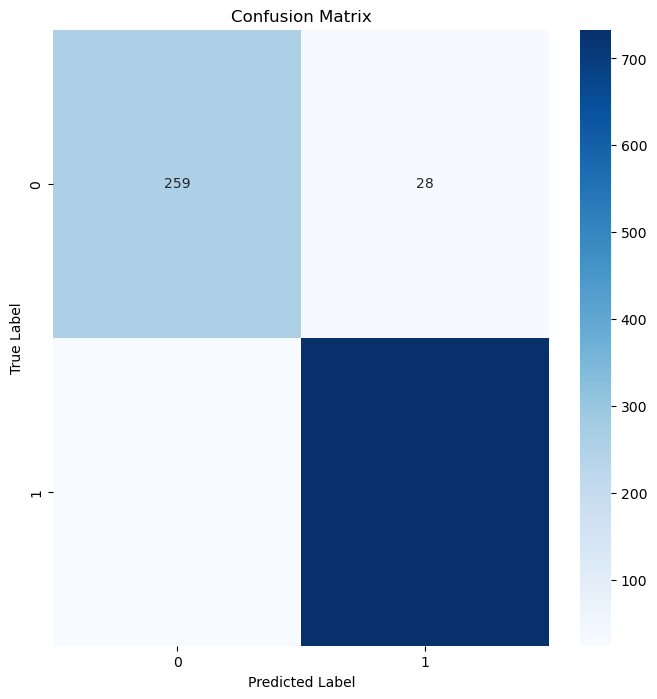

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_class)
plt.figure(figsize=(8, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

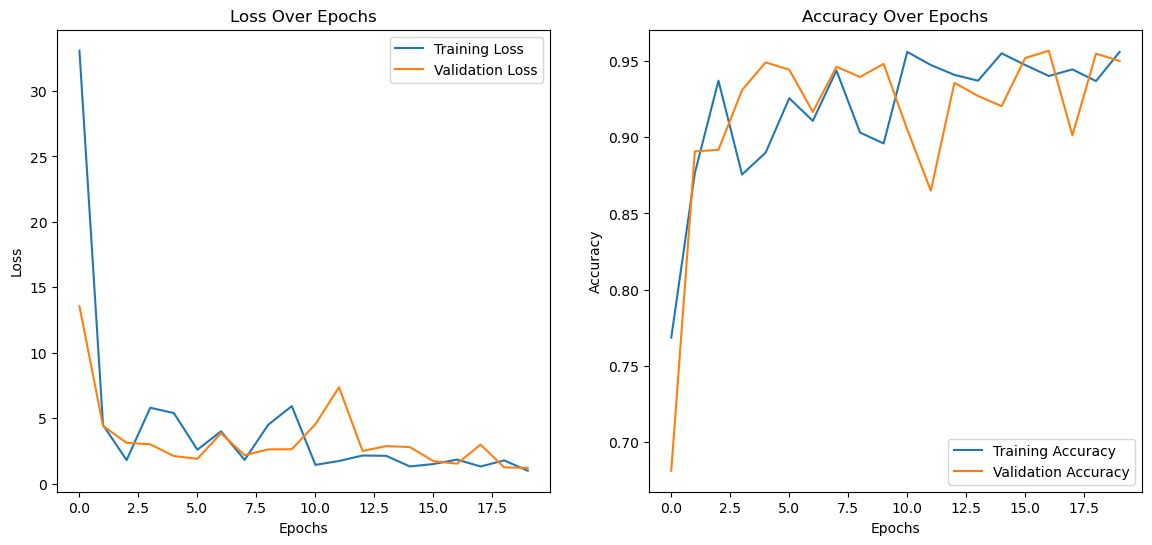

In [18]:
# Train, Val 시각화 - Loss 
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## CNN

### 데이터 준비

In [19]:
import glob
base_path = './xray_classification_pneumonia/Dataset_compressed/train'
file_path = list(glob.glob(base_path + "/*/*.*"))

pneumonia = list(glob.glob(base_path+"/PNEUMONIA/*.*"))
normal = list(glob.glob(base_path+"/NORMAL/*.*"))

In [20]:
len(pneumonia), len(normal)

(3875, 1341)

In [21]:
import matplotlib.pyplot as plt
import os

test = os.path.dirname(file_path[0])
print(test)
class_name = os.path.split(os.path.dirname(test))
print(class_name)

./xray_classification_pneumonia/Dataset_compressed/train\NORMAL
('./xray_classification_pneumonia/Dataset_compressed', 'train')


In [22]:
# folder name to label
labels = []

for fp in file_path:
    tmp = os.path.dirname(fp)
    class_name = os.path.split(tmp)
    if class_name[1] == "PNEUMONIA":
        labels.append(1)
    else:
        labels.append(0)

In [23]:
import numpy as np
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2


img_width = 60
img_height = 60

dataset = np.ndarray(shape=(len(file_path), img_height*img_width), dtype=np.float32)

i=0
for _file in file_path:
    img = cv2.imread(_file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_width, img_height))
    
    dataset[i] = img_resized.flatten()
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


In [24]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

image_width = 60
image_height = 60

channels = 3

dataset = np.ndarray(shape=(len(file_path), image_height, image_width, channels),dtype=np.float32)

i=0
for _file in file_path:
    img = load_img(_file)
    img.thumbnail((image_width, image_height))
    
    x = img_to_array(img)
    
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


### 데이터 시각화

In [25]:
import cv2

im0 = cv2.imread(pneumonia[67])
im1 = cv2.imread(normal[67])

im0.shape, im1.shape

((60, 60, 3), (60, 60, 3))

(-0.5, 59.5, 59.5, -0.5)

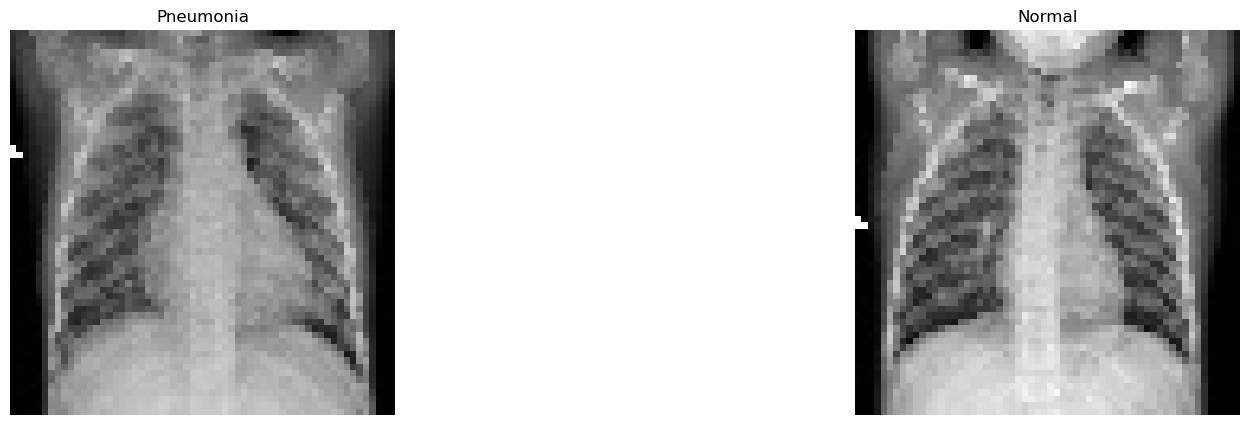

In [26]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Pneumonia');plt.imshow(im0);plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Normal');plt.imshow(im1);plt.axis('off')

In [27]:
# train, val, test dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=321)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
y_train, y_test, y_val = to_categorical(y_train), to_categorical(y_test), to_categorical(y_val)

# preprocess - normalization -> /255.
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_val = x_val.astype('float32')/255.

In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((4172, 60, 60, 3),
 (4172, 2),
 (522, 60, 60, 3),
 (522, 2),
 (522, 60, 60, 3),
 (522, 2))

### CNN 생성

In [29]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

In [30]:
# Vanilla CNN
def build():
    CNN = Sequential()
    
    CNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(60, 60, 3)))
    CNN.add(MaxPooling2D(pool_size=(2, 2)))
    
    CNN.add(Conv2D(64, (3, 3), padding='same', activation='relu',))
    CNN.add(MaxPooling2D(pool_size=(2, 2)))
    
    CNN.add(Flatten())
    CNN.add(Dense(1000, activation='relu'))
    CNN.add(Dense(500, activation='relu'))
    CNN.add(Dense(2, activation='softmax'))
    
    return CNN

In [31]:
# metric function
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (possible_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [32]:
BATCH_SIZE = 32

### 학습

In [33]:
CNN_Adam = build()

opt = optimizers.Adam(learning_rate=0.001)

CNN_Adam.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy',
               recall_m,
               precision_m,
               f1_m]
)

In [34]:
epochs = 20
history = CNN_Adam.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    epochs = epochs,
    batch_size = BATCH_SIZE
)

Epoch 1/20
131/131 [==============================] - 10s 75ms/step - loss: 0.2751 - accuracy: 0.8991 - recall_m: 0.8992 - precision_m: 0.8992 - f1_m: 0.8992 - val_loss: 0.1109 - val_accuracy: 0.9598 - val_recall_m: 0.9614 - val_precision_m: 0.9614 - val_f1_m: 0.9614
Epoch 2/20
131/131 [==============================] - 10s 75ms/step - loss: 0.1022 - accuracy: 0.9638 - recall_m: 0.9640 - precision_m: 0.9640 - f1_m: 0.9640 - val_loss: 0.1031 - val_accuracy: 0.9636 - val_recall_m: 0.9651 - val_precision_m: 0.9651 - val_f1_m: 0.9651
Epoch 3/20
131/131 [==============================] - 10s 75ms/step - loss: 0.0911 - accuracy: 0.9664 - recall_m: 0.9666 - precision_m: 0.9666 - f1_m: 0.9666 - val_loss: 0.1352 - val_accuracy: 0.9559 - val_recall_m: 0.9577 - val_precision_m: 0.9577 - val_f1_m: 0.9577
Epoch 4/20
131/131 [==============================] - 10s 75ms/step - loss: 0.0620 - accuracy: 0.9760 - recall_m: 0.9761 - precision_m: 0.9761 - f1_m: 0.9761 - val_loss: 0.1510 - val_accuracy: 0.9

### 테스트

In [35]:
score = CNN_Adam.evaluate(x_test, y_test)

17/17 [==============================] - 0s 13ms/step - loss: 0.3289 - accuracy: 0.9693 - recall_m: 0.9706 - precision_m: 0.9706 - f1_m: 0.9706


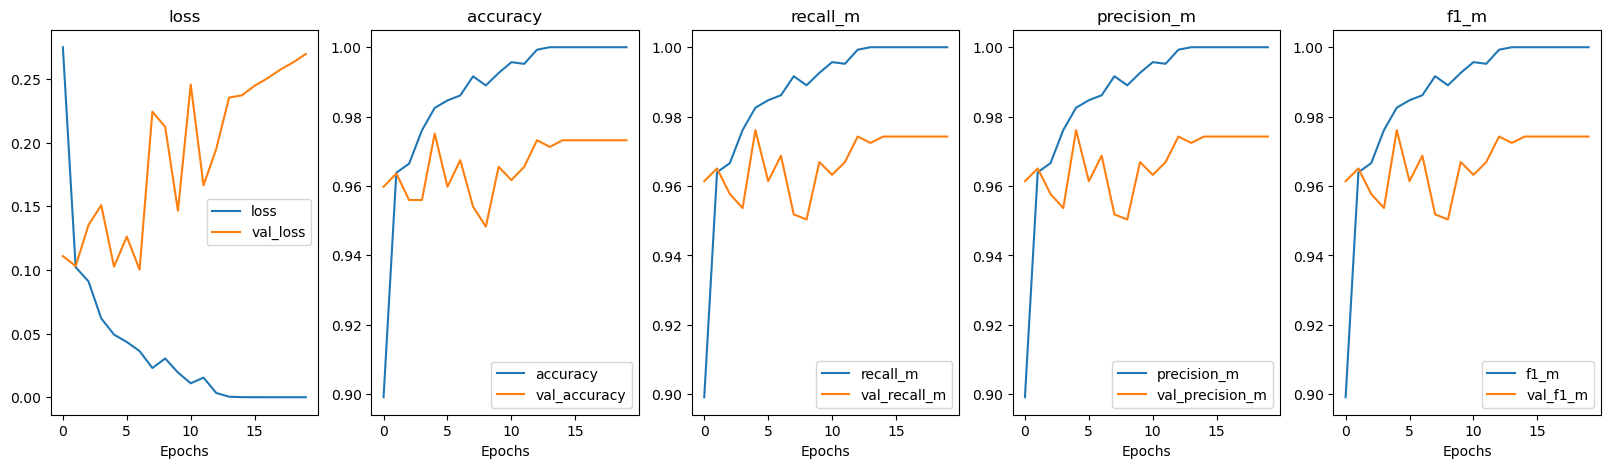

In [36]:
# 시각화
plt.figure(figsize=(20, 5))
for i, key in enumerate(list(history.history.keys())[:5]):
    plt.subplot(1, 5, i+1)
    plt.title(key)
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.legend([key, 'val_'+key])
plt.show()

### 예측

In [37]:
y_pred = CNN_Adam.predict(x_test)

17/17 [==============================] - 0s 14ms/step


In [38]:
y_pred_argmax = np.argmax(np.array(y_pred), axis=1)
y_pred_argmax

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [39]:
# 예측 결과 시각화
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test.argmax(-1), y_pred_argmax))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       128
           1       0.98      0.98      0.98       394

    accuracy                           0.97       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.97      0.97      0.97       522



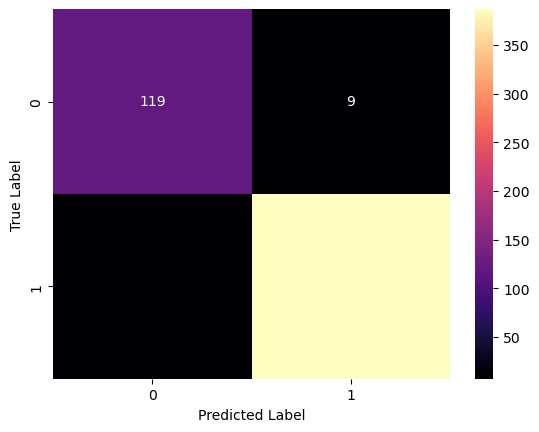

In [40]:
import seaborn as sns

heatmap = sns.heatmap(confusion_matrix(y_test.argmax(-1), y_pred_argmax), annot=True, fmt='.3g', 
                      xticklabels=['0', '1'], yticklabels=['0', '1'], cmap='magma')
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('True Label')
plt.show()

### Inference

In [41]:
# 이미지 9개 랜덤 추출
idx = np.random.randint(0, len(x_test), 9)

In [42]:
import matplotlib.pyplot as plt
target_x, target_y = x_test[idx], y_test[idx]
predictions = CNN_Adam.predict(target_x)
predictions = predictions.argmax(axis= -1)

1/1 [==============================] - 0s 31ms/step


In [45]:
label_name = {
    0:'Normal',
    1:'Pneumonia'
}

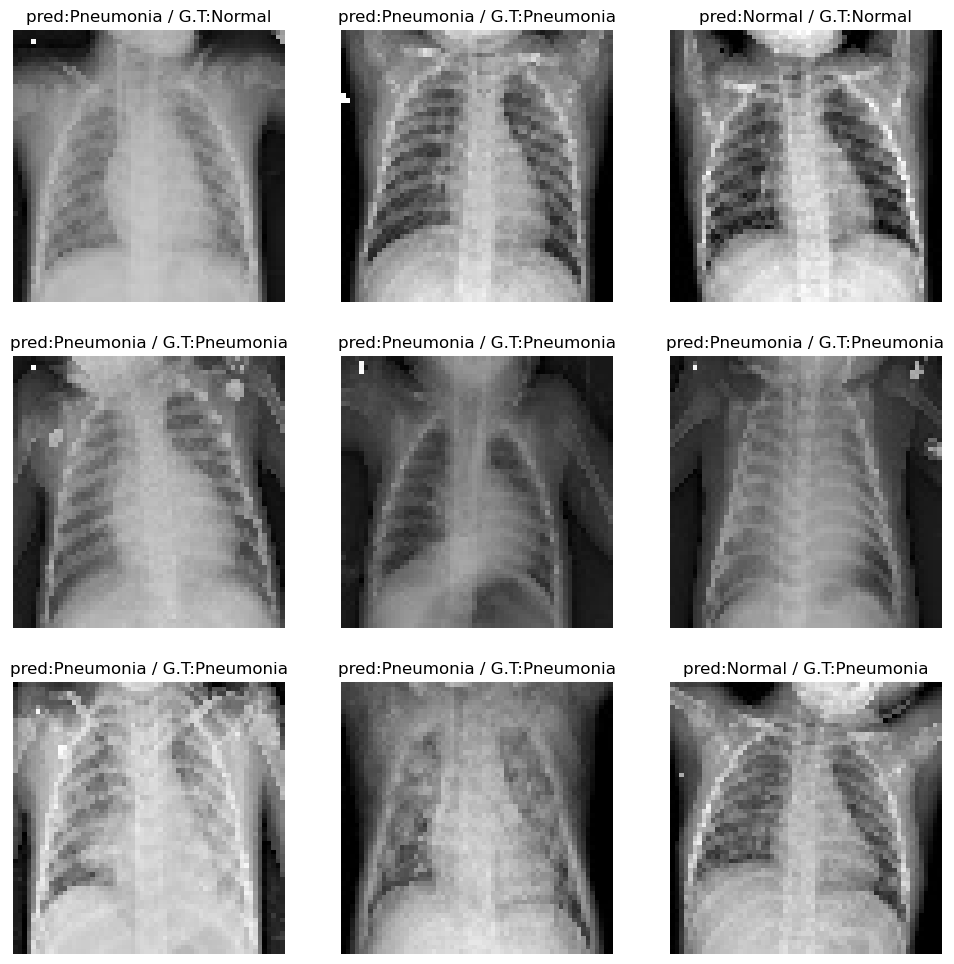

In [47]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    pred = label_name[predictions[i]]
    gth = label_name[y_test[i].argmax()]
    
    plt.title(f'pred:{pred} / G.T:{gth}')
    
    plt.imshow(target_x[i])
    plt.axis('off')

plt.show()

### CNN with PyTorch

In [1]:
import torch

# tensor 생성
x = torch.tensor([1.,2.,3.])
print(x)

if torch.cuda.is_available():
    x = x.to('cuda')
    print(x)
else:
    print('unable!')

tensor([1., 2., 3.])
unable!


### 데이터 로드 및 전처리

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
# 전처리 과정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ),(0.5, ))
])

# 데이터셋 로딩
train = torchvision.datasets.MNIST(root='./data',train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.MNIST(root='./data',train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)



### 신경망 모델

In [4]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5) # 1: 입력 채널, 6: 출력 채널, 5:커널(필터) 크기
        self.pool = nn.MaxPool2d(2,2) # 앞2: 커널 크기, 뒤2: 스트라이드(보폭)
        self.conv2 = nn.Conv2d(6,16,5) # 6: 입력 채널, 16: 출력 채널, 5: 커널 크기
        self.fc1 = nn.Linear(16*4*4, 120) # 16*4*4: 입력, 120: 출력
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self,x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4) # flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

### 모델 생성

In [7]:
net = SimpleCNN().to('cpu') # 여기 컴퓨터는 cuda 불가능

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [9]:
num_epochs = 5
train_val_loss = []
val_loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    net.train() # 모델을 학습 모델로 변경
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs,labels = inputs.to('cpu'), labels.to('cpu')        
        
        optimizer.zero_grad() # 모든 변화율(gradient)을 0으로 초기화
        outputs = net(inputs) # 순전파
        
        loss = criterion(outputs, labels) # 손실 함수 계산
        loss.backward() # 역전파
        optimizer.step() # 변화율을 사용하여 가중치 업데이트

        running_loss += loss.item()
        if i % 100 == 99: # 100번째 미니배치마다 손실 출력
            train_val_loss.append(running_loss / 100)
            print(f'Epoch :{epoch+1}, Batch:{i+1}, TrainLoss:{running_loss / 100}')
            running_loss = 0.0
    
    # 검증 손실 계산
    net.eval() # 모델을 평가 모델로 변경
    val_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to('cpu'), labels.to('cpu')
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    val_loss_values.append(val_loss)
    print(f'Epoch :{epoch+1}, Validation Loss :{val_loss}')

print('Finish!')

Epoch :1, Batch:100, TrainLoss:0.6560260137170553
Epoch :1, Batch:200, TrainLoss:0.17995274249464274
Epoch :1, Batch:300, TrainLoss:0.16231832833960652
Epoch :1, Batch:400, TrainLoss:0.1379930473305285
Epoch :1, Batch:500, TrainLoss:0.1278194354660809
Epoch :1, Batch:600, TrainLoss:0.12902541504241527
Epoch :1, Batch:700, TrainLoss:0.10293181816581637
Epoch :1, Batch:800, TrainLoss:0.11629203690681607
Epoch :1, Batch:900, TrainLoss:0.11078194919857197
Epoch :1, Validation Loss :0.13580152479884255
Epoch :2, Batch:100, TrainLoss:0.09529434943571687
Epoch :2, Batch:200, TrainLoss:0.1081526554794982
Epoch :2, Batch:300, TrainLoss:0.1065960686490871
Epoch :2, Batch:400, TrainLoss:0.09234804400824942
Epoch :2, Batch:500, TrainLoss:0.10822303294902667
Epoch :2, Batch:600, TrainLoss:0.10672787798568606
Epoch :2, Batch:700, TrainLoss:0.08349581573042088
Epoch :2, Batch:800, TrainLoss:0.0905282355635427
Epoch :2, Batch:900, TrainLoss:0.08078242229530588
Epoch :2, Validation Loss :0.082304753177

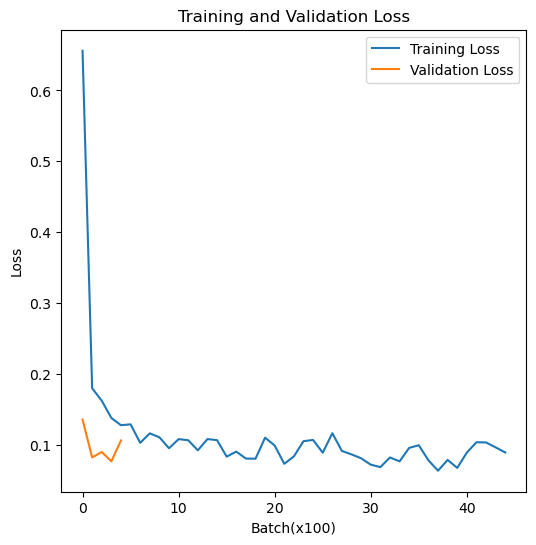

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(train_val_loss, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Batch(x100)')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

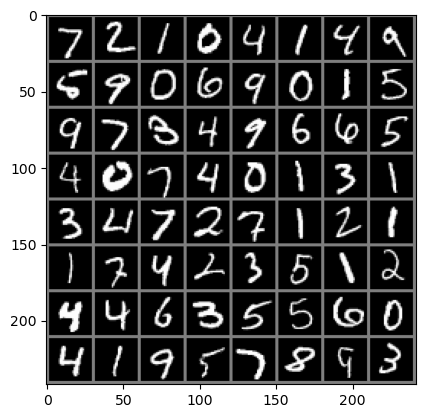

Predicted:  7 2 1 0 4 1 4 9
Ground Truth:  7 2 1 0 4 1 4 9


In [12]:
import numpy as np
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5 # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

# 테스트 데이터 예측
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images))

# 예측 출력
image, labels = images.to('cpu'), labels.to('cpu')
outputs = net(image)
_, predicted = torch.max(outputs, 1)

# 예측 결과와 실제 레이블 출력
print('Predicted: ',' '.join(f'{predicted[j].item()}' for j in range(8)))
print('Ground Truth: ',' '.join(f'{labels[j].item()}' for j in range(8)))